Reference: 

https://nipunbatra.github.io/blog/2017/50-ggplot-python-1.html

http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/



### Library

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import plotly.plotly as py

### Color scheme - tableau10
Randy Olson - How to make beautiful data visualizations in Python with matplotlib: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

Tableau’s "tableau10" : http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html


In [4]:
# These are the "Tableau 20" colors as RGB.    
tableau10 = [(31, 119, 180),(255, 127, 14), (44, 160, 44), (214, 39, 40),    
             (148, 103, 189), (140, 86, 75), (227, 119, 194), (127, 127, 127),   
             (188, 189, 34), (23, 190, 207),]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)   

### Getting the data

In [5]:
cars=pd.read_csv("cars-sample.csv")

### View the data

In [6]:
cars.loc[:,['Manufacturer','MPG','Weight']]

,Manufacturer,MPG,Weight
0,ford,17.0,3449
1,ford,15.0,4341
2,ford,NaN,4034
3,ford,NaN,3353
4,toyota,24.0,2372
5,ford,21.0,2587
6,bmw,26.0,2234
7,ford,10.0,4615
8,toyota,25.0,2228
9,ford,25.0,2046


### panda default plot

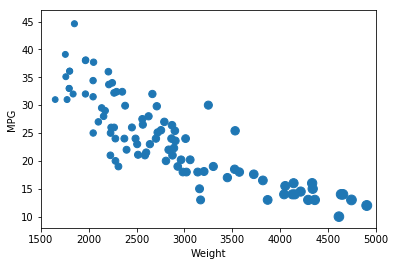

In [7]:
cars.plot(kind='scatter',x='Weight',y='MPG',ylim=((8,47)),xlim=((1500,5000)),s=cars['Weight']*0.02)

### matplotlib.pyplot

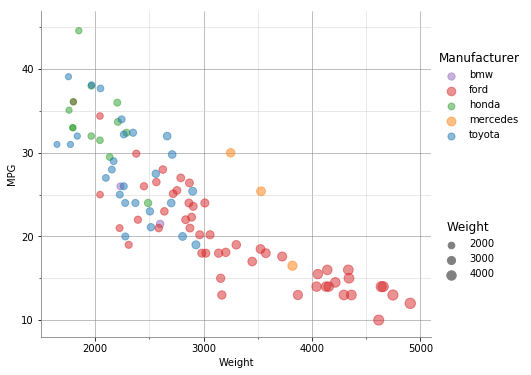

In [9]:
groups=cars.groupby('Manufacturer')
colors=tableau10[0:5]
fig,ax=plt.subplots(figsize=(7, 6))

plt.xticks(range(2000, 5100, 1000))
plt.yticks(range(10, 41, 10))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


# Plotting each group
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter',x='Weight',y='MPG',ylim=((8,47)),xlim=((1500,5101)),
               s=group['Weight']*0.022,label=name, ax=ax,color=colors[4-i],alpha=0.5)

#Legend for Manufacturer colors
lgd1=ax.legend(bbox_to_anchor=(1.25,0.9),
              frameon=False,
              title="Manufacturer",title_fontsize=12)
#Legend for point size
weightBins=[2000,3000,4000]
for bin in weightBins:
    plt.scatter([],[],s=bin*0.022,c="grey",label=str(bin))
h,l=plt.gca().get_legend_handles_labels()
lgd2=plt.legend(h[5:],l[5:],title="Weight",frameon=False,borderpad=1, bbox_to_anchor=(1.2,0.4),title_fontsize=12)
plt.gca().add_artist(lgd1)

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Customize the grid
grid=ax.grid(linestyle='-', linewidth='0.5', color='grey')
grid=ax.grid(which='minor',linestyle='-', linewidth='0.5', color='lightgrey')

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_color("grey")    
ax.spines["left"].set_color("grey") 




In [11]:
py.sign_in('YutingHan', 'vOM2piMGQqVzXH9lSdFN')
py.plot_mpl(fig)

'https://plot.ly/~YutingHan/16'